# Two Planet Fit: Kepler 29

In [1]:
import exoplanet as xo
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from astropy.time import Time

import sys
sys.path.append("../helpers")
import data
import xo_archive

%config InlineBackend.figure_format = "retina"

# Get the data

Get all Kepler data using Lightkurve.

In [2]:
%%time
flat_lc = data.get_flattened_lc("Kepler-29", mission="Kepler", exptime=1800)

CPU times: user 7.54 s, sys: 12.2 s, total: 19.8 s
Wall time: 8.43 s


In [3]:
from importlib import reload
reload(xo_archive)

<module 'xo_archive' from '/home/tom/Documents/research/radius-valley/notebooks/../helpers/xo_archive.py'>

In [4]:
xo_archive.get_exoplanet_parameters(search_name="Kepler", custom_cond="sy_pnum=2 and ttv_flag=0", columns=["pl_name", "pl_letter"])

[{'pl_name': 'Kepler-462 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-466 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-495 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-120 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-121 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-109 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-118 c', 'pl_letter': 'c'},
 {'pl_name': 'Kepler-501 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-119 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-123 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-112 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-116 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-69 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-115 c', 'pl_letter': 'c'},
 {'pl_name': 'Kepler-105 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-458 c', 'pl_letter': 'c'},
 {'pl_name': 'Kepler-94 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-125 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-424 b', 'pl_letter': 'b'},
 {'pl_name': 'Kepler-120 c', 'pl_letter': 'c'},
 {'pl_name': 'Kepler-109 c', 'pl_letter': 

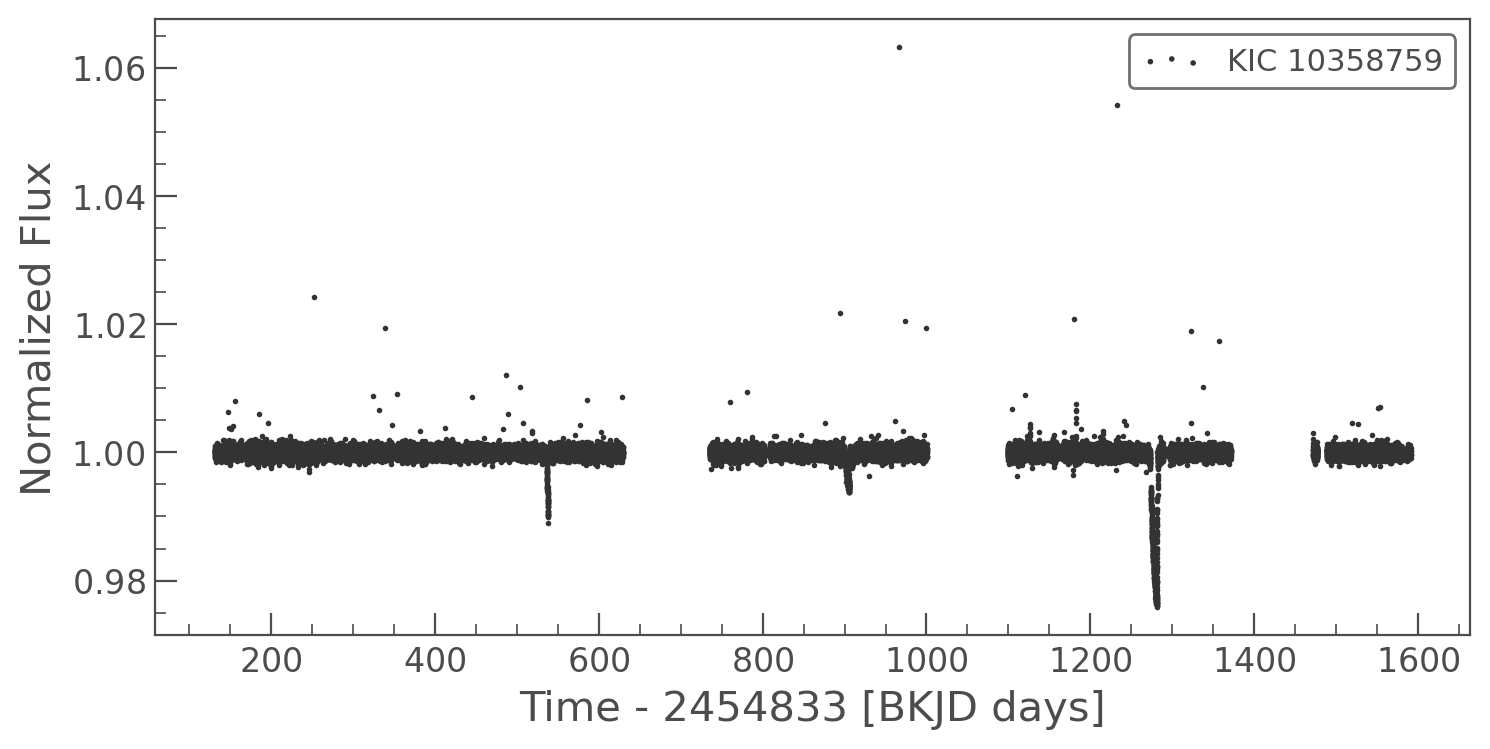

In [5]:
flat_lc.scatter()
plt.show()

# Remove outliers
Next we can remove outliers from the data, this is important but we have to be careful to avoid the transits. First we need the planet data

In [6]:
planet_parameters = xo_archive.get_exoplanet_parameters("kepler-29 ", which="composite")
n_planets = len(planet_parameters)
param_lists = xo_archive.transpose_parameters(planet_parameters)

In [7]:
lc = data.remove_outliers(flat_lc, param_lists["pl_orbper"], param_lists["pl_tranmid"], param_lists["pl_trandur"],
                          transit_sigma_upper=5)

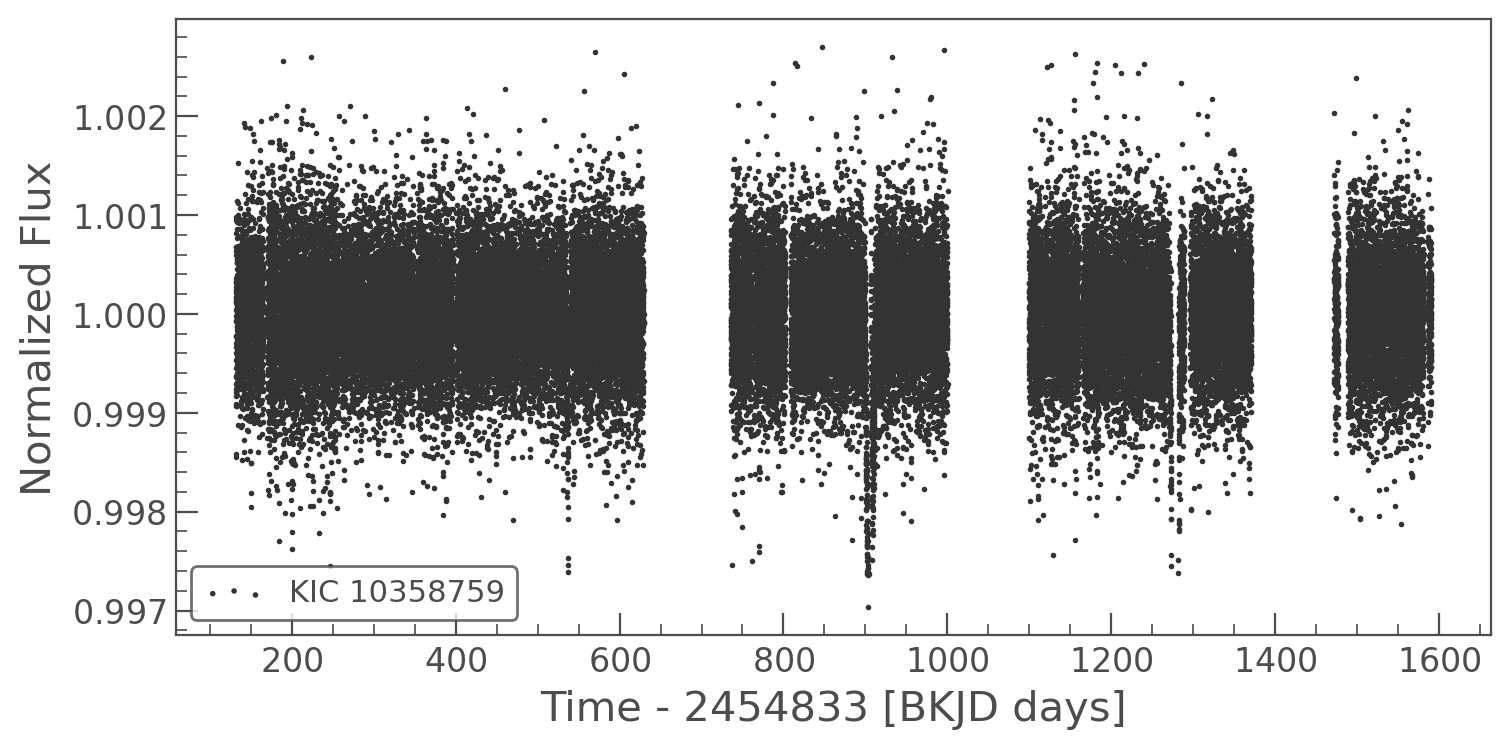

In [8]:
lc.scatter()
plt.show()

## Folded lightcurves

Now we can try folding the lightkurves at the different planet periods to check that they look good

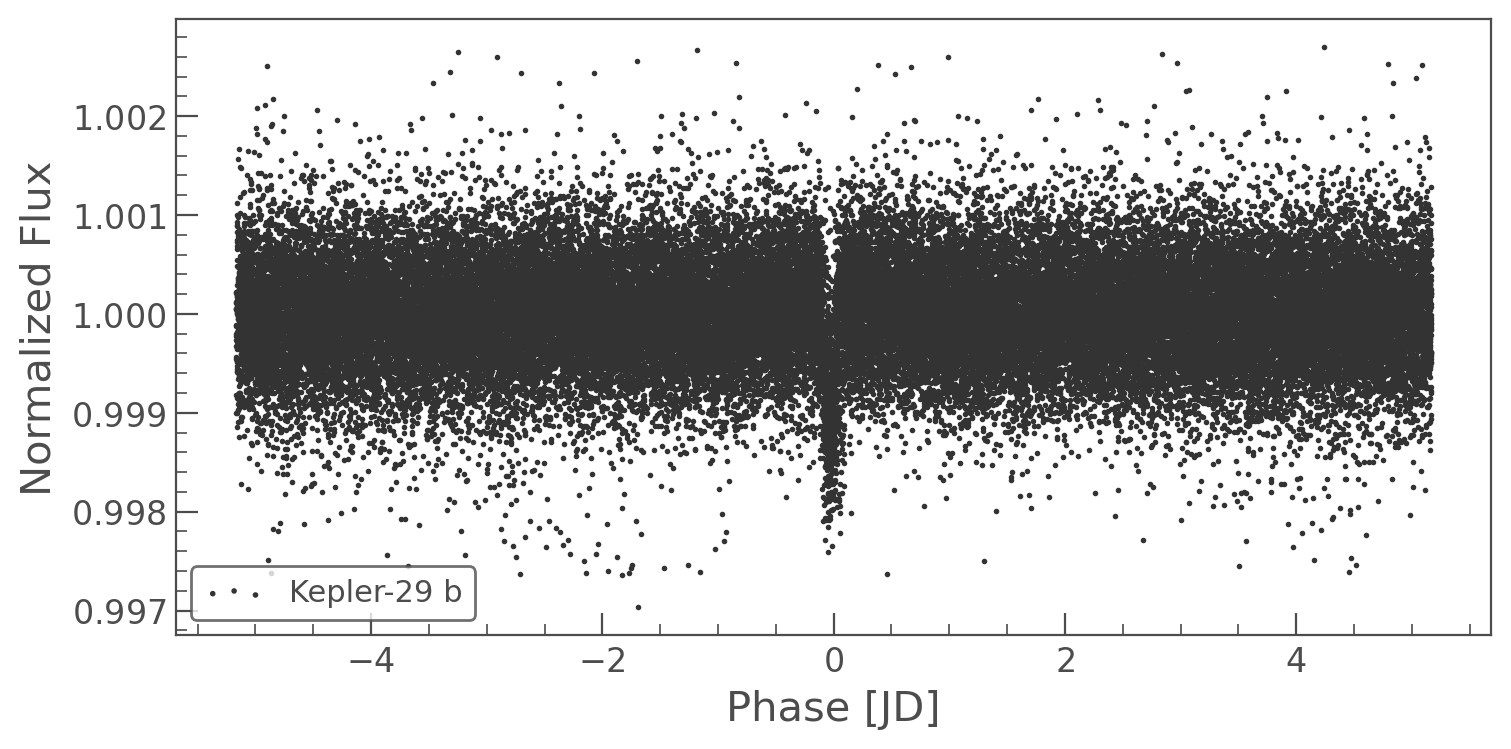

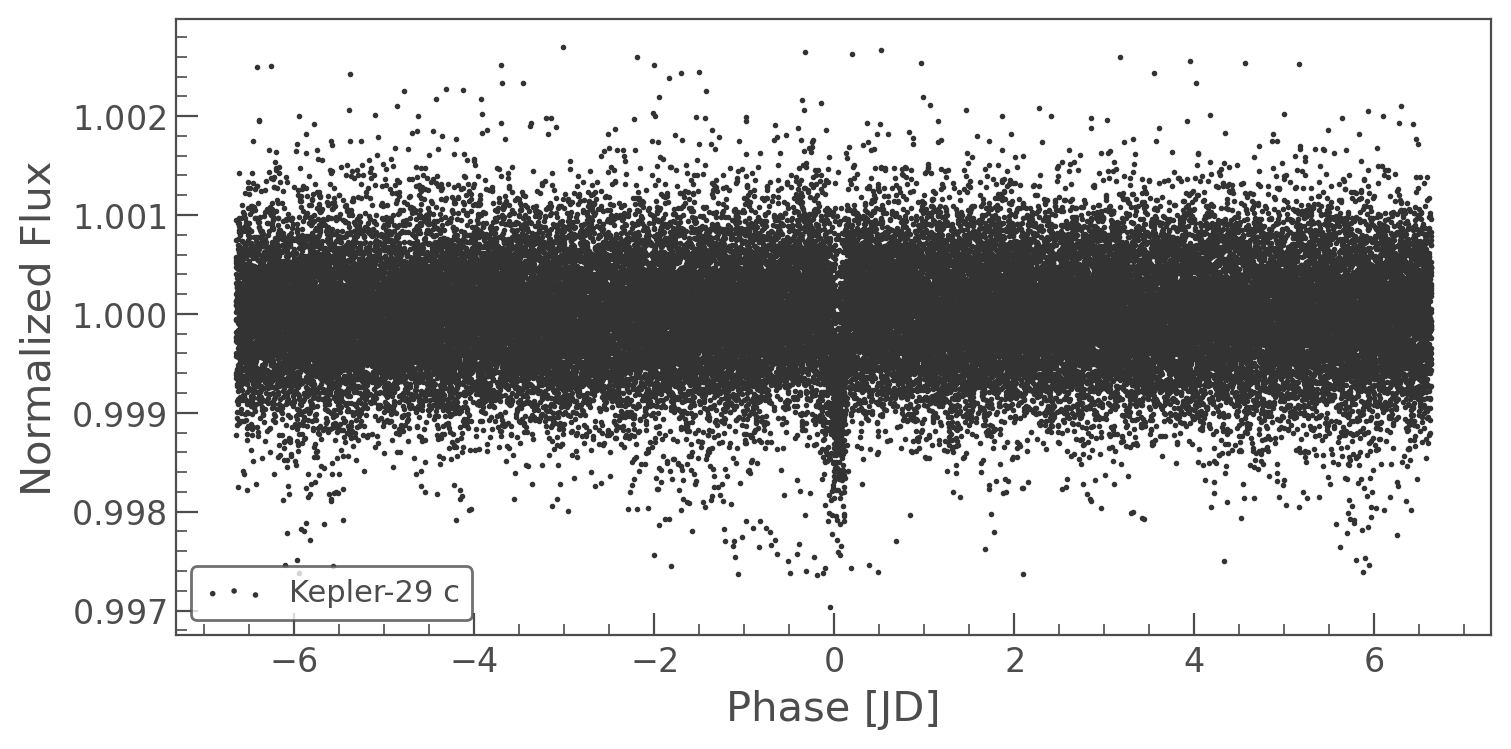

In [9]:
for i in range(len(planet_parameters)):
    ax = lc.fold(period=planet_parameters[i]["pl_orbper"],
                 epoch_time=Time(planet_parameters[i]["pl_tranmid"] * u.day, format="jd").bkjd).scatter(label=planet_parameters[i]["pl_name"])
    plt.show()

# Now to fit things

In [22]:
import fit
reload(fit)

<module 'fit' from '/home/tom/Documents/research/radius-valley/notebooks/../helpers/fit.py'>

In [23]:
map_soln, model = fit.optimise_model(lc, param_lists)

optimizing logp for variables: [log_rho_star, b, r, u, logP, t0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 310778.1240788351 -> 311825.9984545492


In [12]:
map_soln

{'mean': array(1.00000708),
 't0': array([170.38645745, 172.11303848]),
 'logP': array([2.33594864, 2.58678152]),
 'u_quadlimbdark__': array([1.96227276, 2.5843963 ]),
 'r_interval__': array([-0.97972988, -1.35293256]),
 'b_impact__': array([ 0.31369253, -0.46889529]),
 'log_rho_star': array(0.020384),
 'period': array([10.33926355, 13.28693893]),
 'u': array([ 1.74135837, -0.80499374]),
 'r': array([0.02802159, 0.02133374]),
 'b': array([0.5939768 , 0.39308863]),
 'rho_star': array(1.04805483),
 'light_curves': array([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]])}

# Let's see how the fit looks

In [13]:
param_lists

{'pl_name': ['Kepler-29 b', 'Kepler-29 c'],
 'pl_letter': ['b', 'c'],
 'pl_orbper': [10.33974, 13.28613],
 'pl_orbincl': [89.13, 89.97],
 'pl_orbeccen': [0.0, 0.0],
 'pl_trandep': [0.102, 0.10396],
 'pl_tranmid': [2455003.38549, 2455005.11932],
 'pl_trandur': [3.041, 3.2825],
 'pl_ratror': [0.03194, 0.02928],
 'pl_imppar': [0.379, 0.929],
 'st_dens': [3.18827, 3.45528]}

In [14]:
map_soln

{'mean': array(1.00000708),
 't0': array([170.38645745, 172.11303848]),
 'logP': array([2.33594864, 2.58678152]),
 'u_quadlimbdark__': array([1.96227276, 2.5843963 ]),
 'r_interval__': array([-0.97972988, -1.35293256]),
 'b_impact__': array([ 0.31369253, -0.46889529]),
 'log_rho_star': array(0.020384),
 'period': array([10.33926355, 13.28693893]),
 'u': array([ 1.74135837, -0.80499374]),
 'r': array([0.02802159, 0.02133374]),
 'b': array([0.5939768 , 0.39308863]),
 'rho_star': array(1.04805483),
 'light_curves': array([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]])}

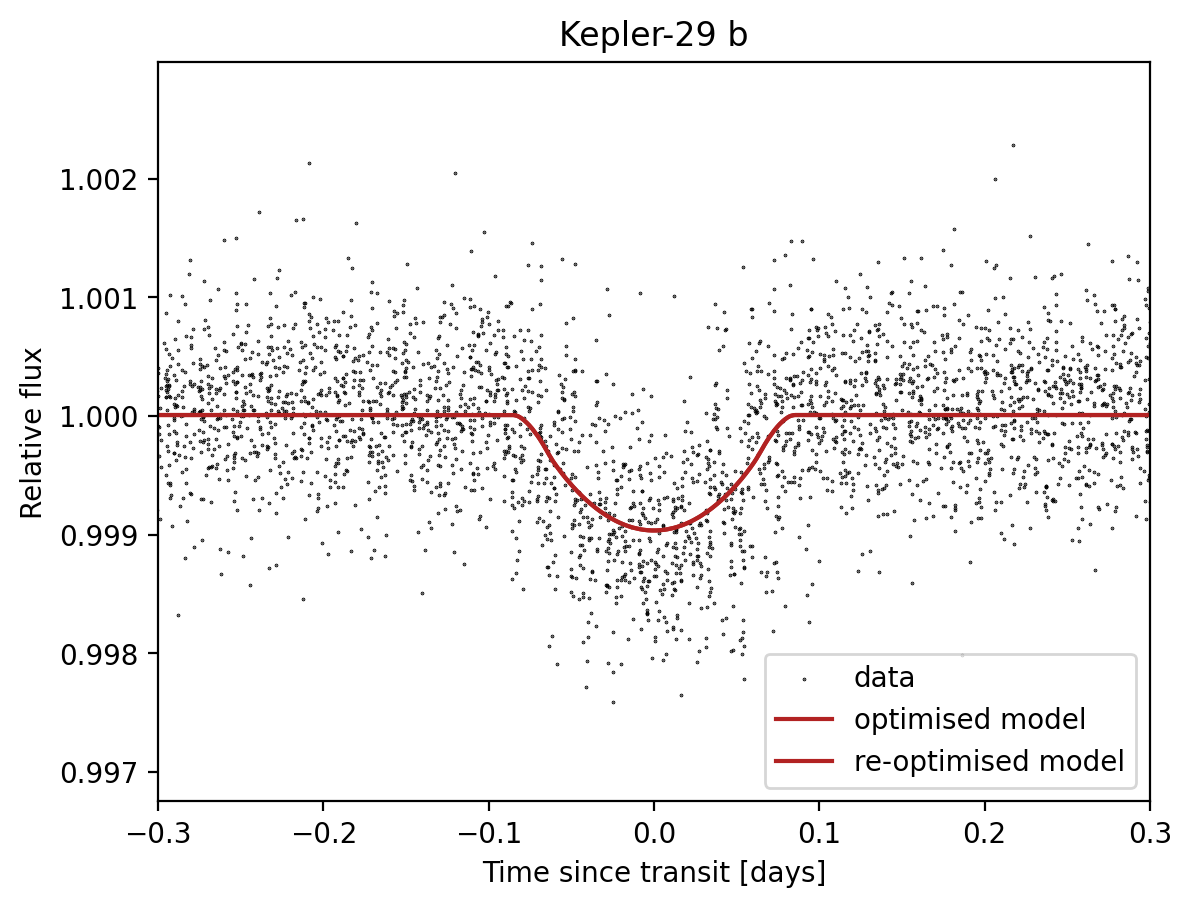

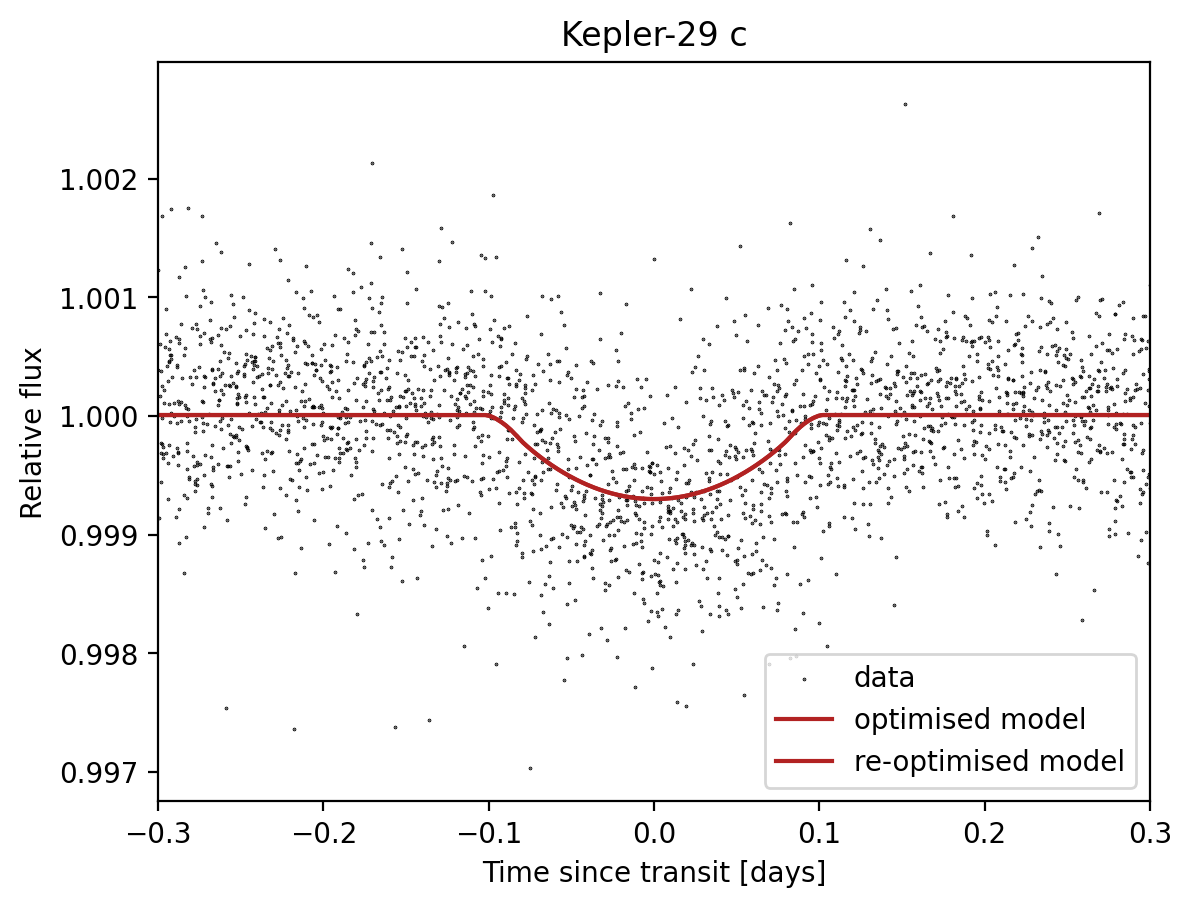

In [15]:
t = lc["time"].value
y = lc["flux"].value

for i in range(n_planets):
    plt.figure()

    p = map_soln["period"][i]
    t0 = map_soln["t0"][i]

    # Plot the folded data
    x_fold = (t - t0 + 0.5 * p) % p - 0.5 * p
    plt.scatter(
        x_fold, y, label="data", zorder=-1000, s=0.1, color="black"
    )

    # Plot the folded model within 0.3 days of the transit
    inds = np.argsort(x_fold)
    inds = inds[np.abs(x_fold)[inds] < 0.3]
    pred = map_soln["light_curves"][inds, i] + map_soln["mean"]
    plt.plot(x_fold[inds], pred, color="firebrick", label="optimised model")
    plt.plot(x_fold[inds], pred, color="firebrick", label="re-optimised model")

    plt.ylabel("relative flux")
    plt.xlabel("time [days]")
    _ = plt.xlim(t.min(), t.max())

    plt.legend(fontsize=10, loc=4)
    plt.xlim(-0.5 * p, 0.5 * p)
    plt.xlabel("Time since transit [days]")
    plt.ylabel("Relative flux")
    plt.title(param_lists["pl_name"][i])
    plt.xlim(-0.3, 0.3)
    plt.show()

In [24]:
import pymc3_ext as pmx

In [27]:
%%time
with model:
    trace = pmx.sample(
        tune=1000,
        draws=1000,
        start=map_soln,
        cores=6,
        chains=2,
        target_accept=0.9,
        return_inferencedata=True,
    )

Multiprocess sampling (2 chains in 6 jobs)
NUTS: [log_rho_star, b, r, u, logP, t0, mean]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1701 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 3min 40s, sys: 13min 11s, total: 16min 51s
Wall time: 28min 40s


In [29]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [35]:
param_lists

{'pl_name': ['Kepler-29 b', 'Kepler-29 c'],
 'pl_letter': ['b', 'c'],
 'pl_orbper': [10.33974, 13.28613],
 'pl_orbincl': [89.13, 89.97],
 'pl_orbeccen': [0.0, 0.0],
 'pl_trandep': [0.102, 0.10396],
 'pl_tranmid': [2455003.38549, 2455005.11932],
 'pl_trandur': [3.041, 3.2825],
 'pl_ratror': [0.03194, 0.02928],
 'pl_imppar': [0.379, 0.929],
 'st_dens': [3.18827, 3.45528]}

In [53]:
trace["posterior"]["r"][:, :, 1]

<xarray.DataArray 'r' (chain: 2, draw: 1000)>
array([[0.02075229, 0.01887586, 0.0206564 , ..., 0.01998239, 0.02062881,
        0.02004694],
       [0.01941304, 0.01973929, 0.019356  , ..., 0.01945127, 0.01986249,
        0.01963515]])
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
    r_dim_0  int64 1

In [64]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

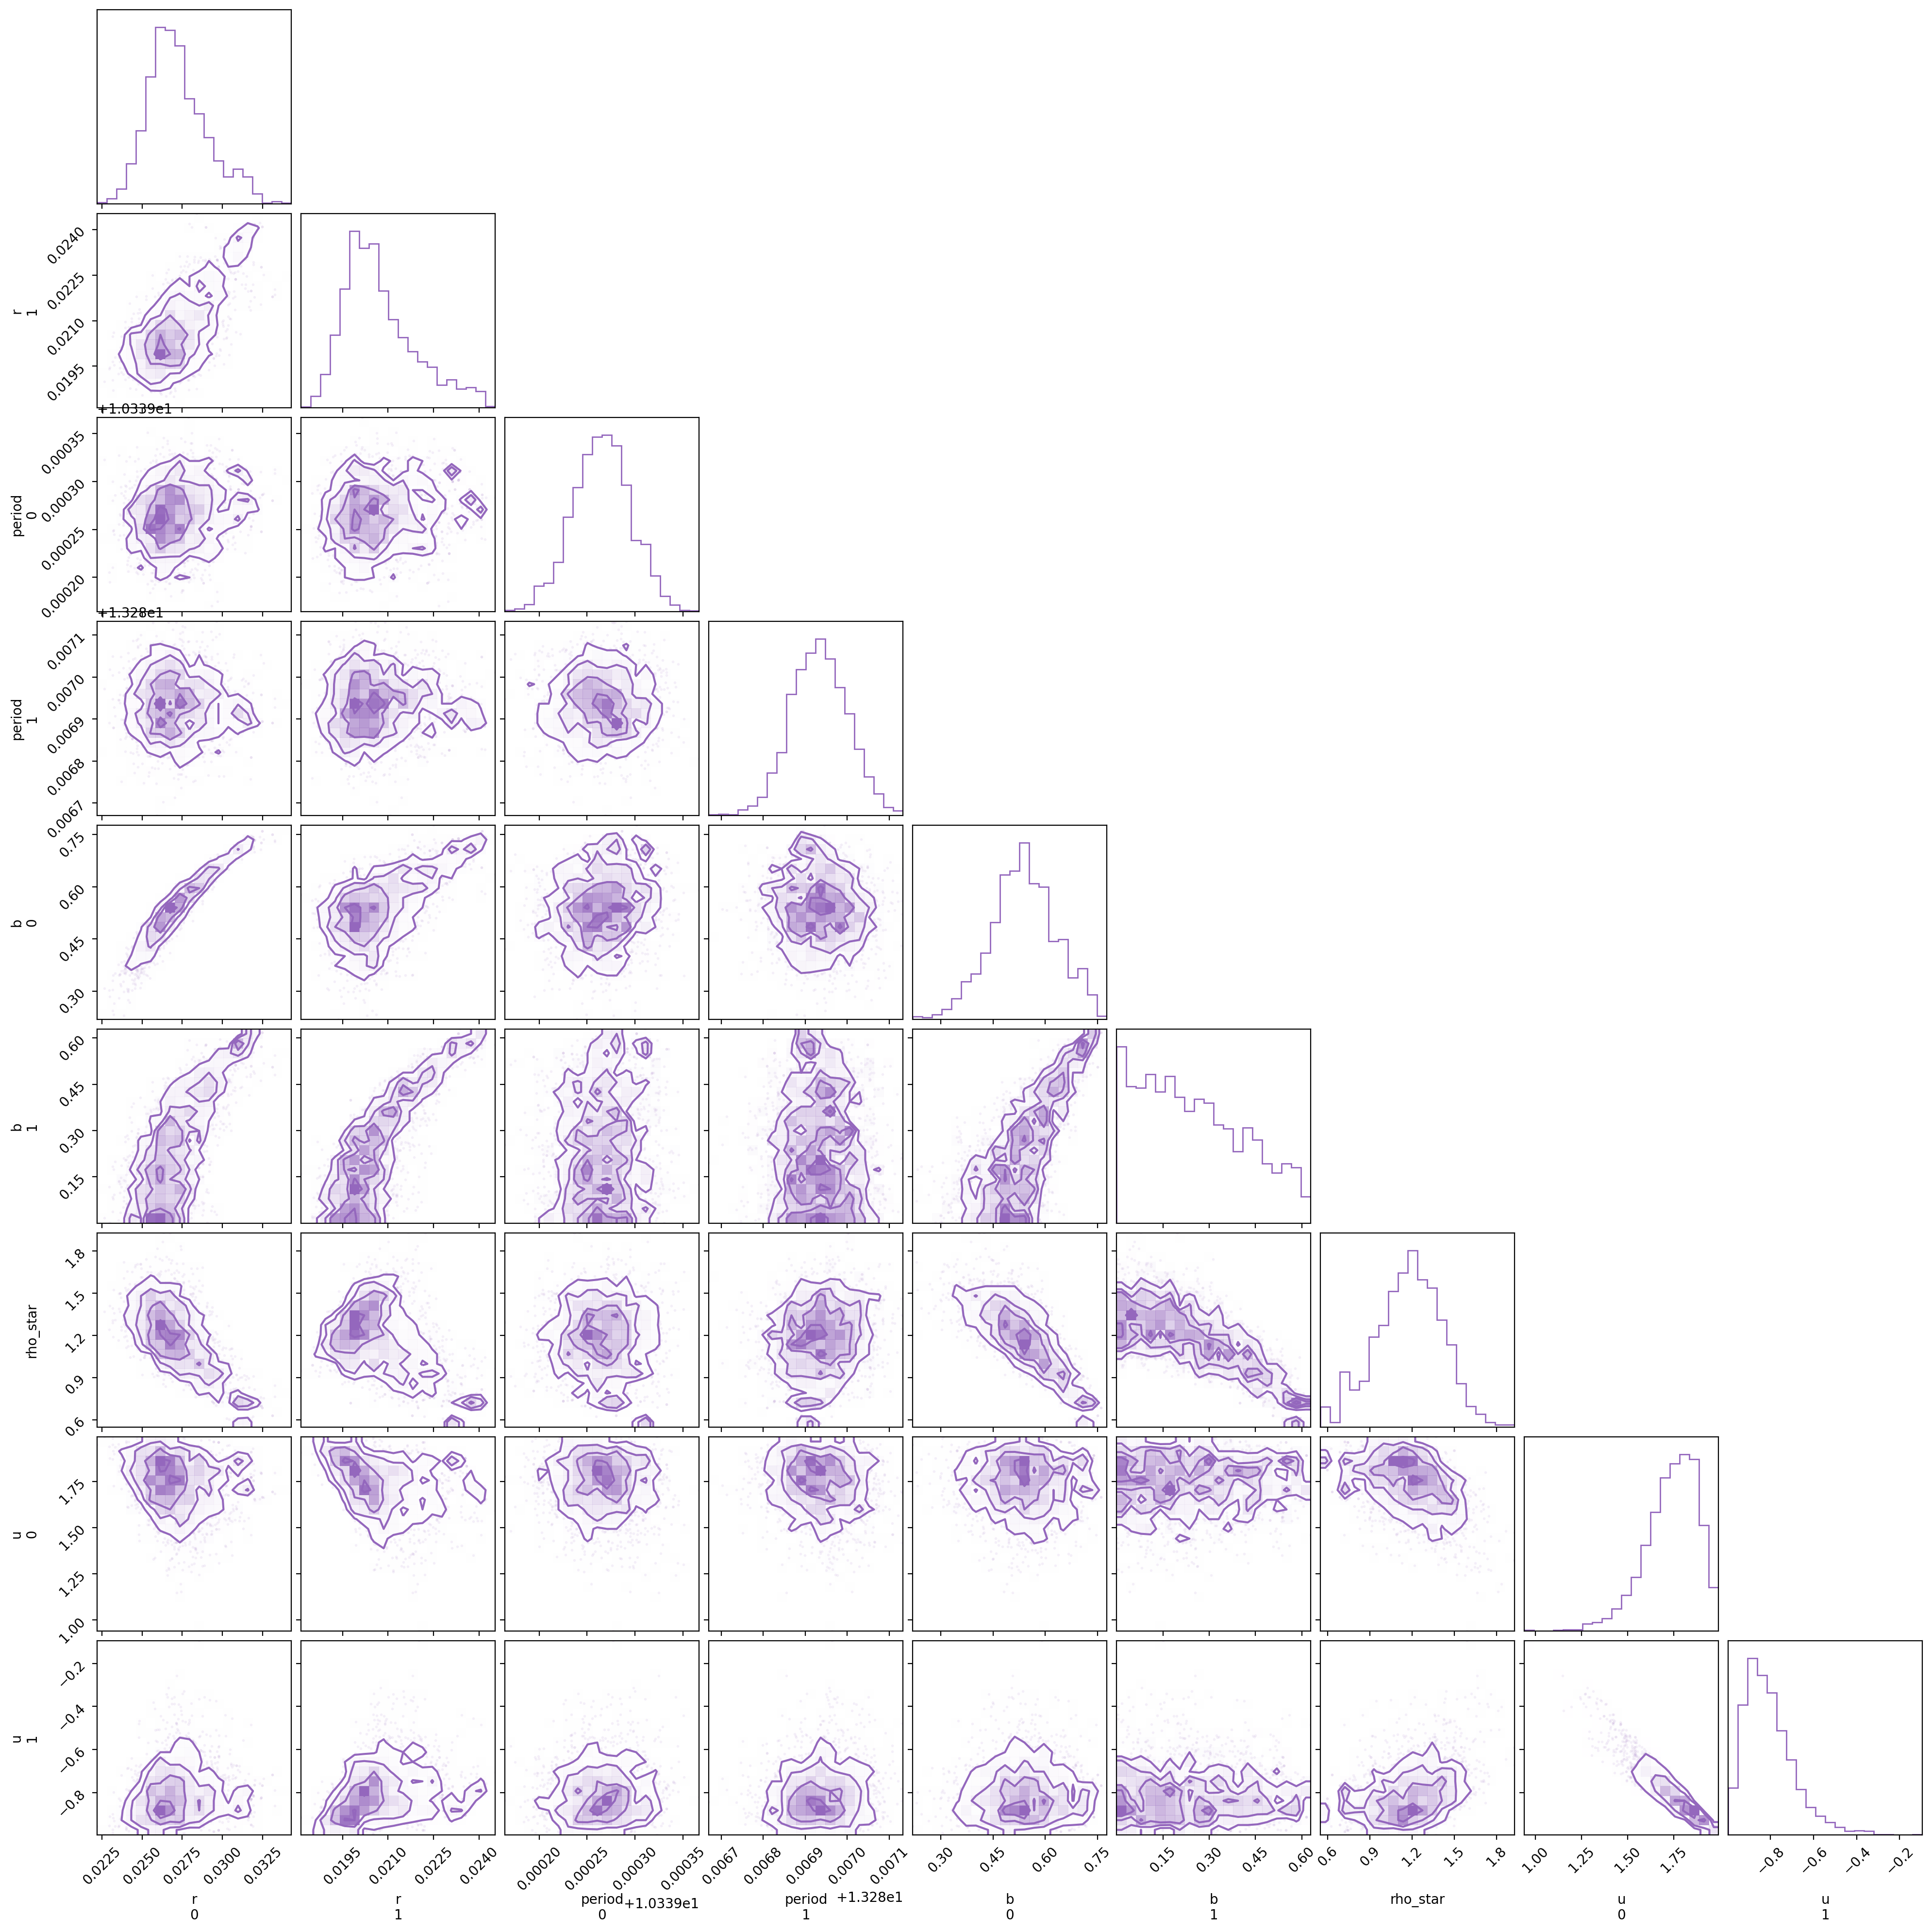

In [63]:
import corner

# truth = dict(
#     zip(
#         ["period", "r"],
#         pmx.eval_in_model([period, r], model.test_point, model=model),
#     )
# )
_ = corner.corner(
    trace,
    var_names=["r", "period", "b", "rho_star", "u"],
    color="tab:purple"
)
plt.savefig("two_planet_joint.pdf", format="pdf", bbox_inches="tight")
plt.show()

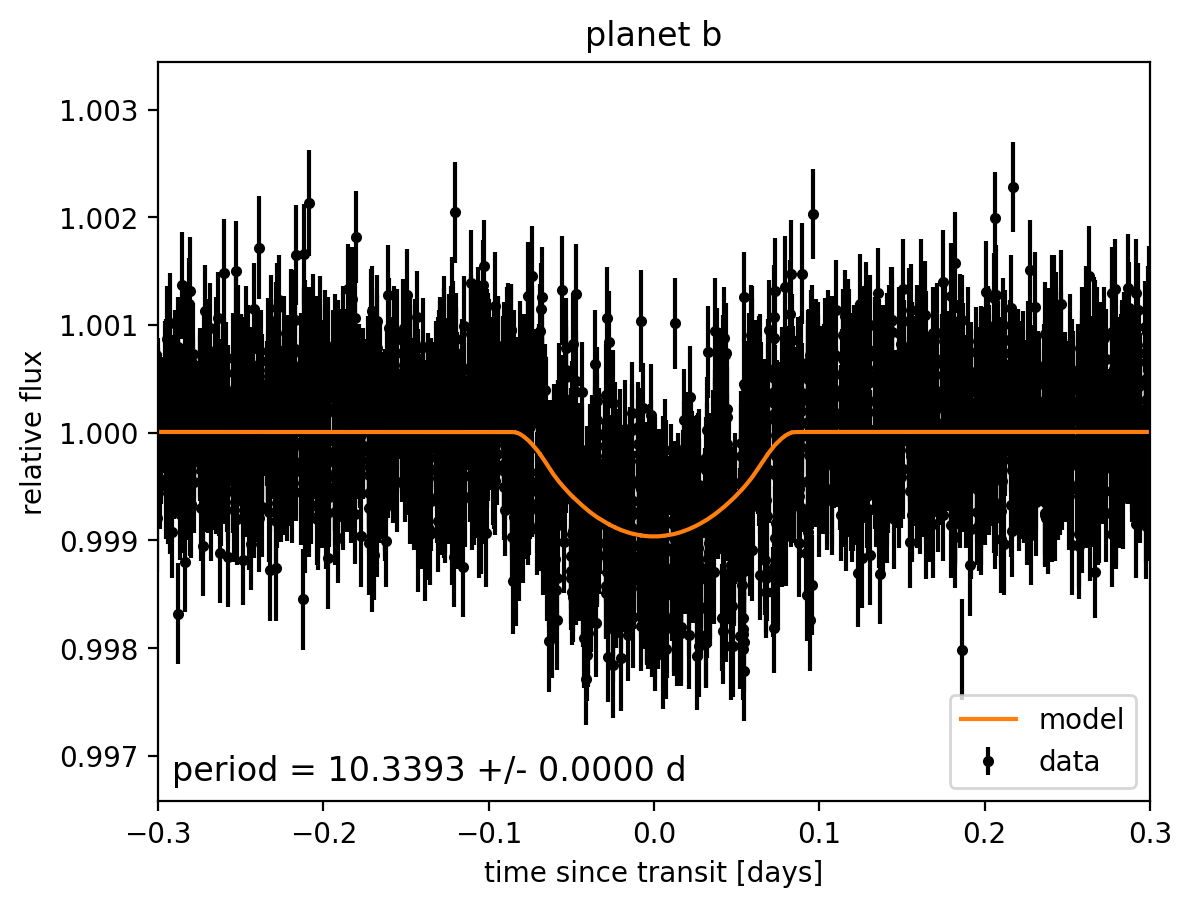

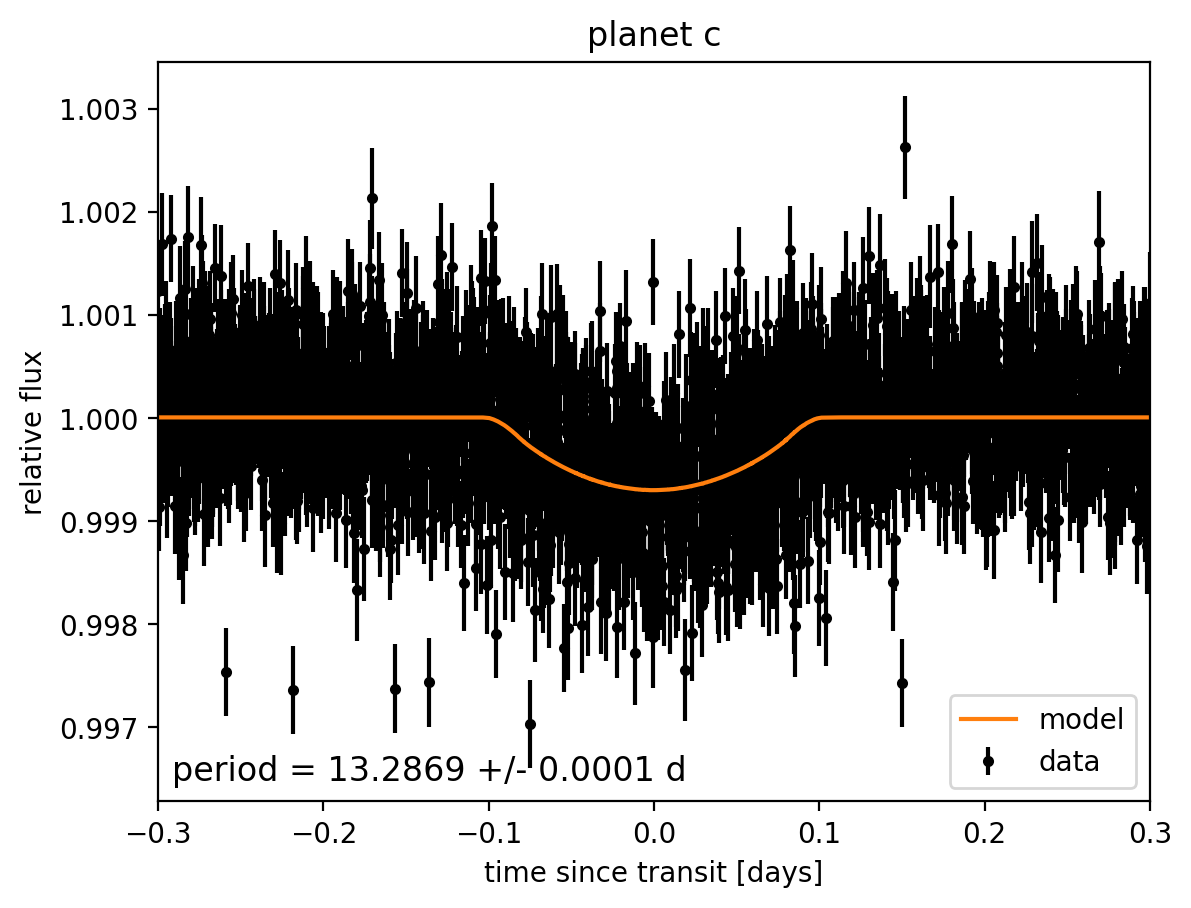

In [68]:
yerr=lc["flux_err"].value
for n, letter in enumerate("bc"):
    plt.figure()

    # Get the posterior median orbital parameters
    period_trace = trace.posterior["period"].values[:, :, n]
    p = np.median(period_trace)
    t0 = np.median(trace.posterior["t0"].values[:, :, n])

    # Compute the median of posterior estimate of the contribution from
    # the other planet. Then we can remove this from the data to plot
    # just the planet we care about.
    lcs = trace.posterior["light_curves"].values
    other = np.median(lcs[:, :, :, (n + 1) % 2], axis=(0, 1))

    # Plot the folded data
    x_fold = (t - t0 + 0.5 * p) % p - 0.5 * p
    plt.errorbar(
        x_fold, y - other, yerr=yerr, fmt=".k", label="data", zorder=-1000
    )

    # Plot the folded model
    inds = np.argsort(x_fold)
    inds = inds[np.abs(x_fold)[inds] < 0.3]
    pred = lcs[:, :, inds, n] + trace.posterior["mean"].values[:, :, None]
    pred = np.median(pred, axis=(0, 1))
    plt.plot(x_fold[inds], pred, color="C1", label="model")

    # Annotate the plot with the planet's period
    txt = "period = {0:.4f} +/- {1:.4f} d".format(
        np.mean(period_trace), np.std(period_trace)
    )
    plt.annotate(
        txt,
        (0, 0),
        xycoords="axes fraction",
        xytext=(5, 5),
        textcoords="offset points",
        ha="left",
        va="bottom",
        fontsize=12,
    )

    plt.legend(fontsize=10, loc=4)
    plt.xlim(-0.5 * p, 0.5 * p)
    plt.xlabel("time since transit [days]")
    plt.ylabel("relative flux")
    plt.title("planet {0}".format(letter))
    plt.xlim(-0.3, 0.3)
    plt.show()